In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [5]:
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv(r'C:\Users\vrssv\Desktop\DA\Challenge\Day 06\Warehouse_and_Retail_Sales.csv')

In [9]:
print("First look at the data:")
print(df.head())

First look at the data:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4    

In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB
None


Insight: This code is our foundation. pandas (pd) is our workhorse for handling the table-like data. The .head() and .info() methods give us a crucial first glance at the data's structure, column names, and data types.

In [13]:
print("Missing Values in each column:")
print(df.isnull().sum())

Missing Values in each column:
YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [15]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [27]:
print("\nUnique SUPPLIERS:", df['SUPPLIER'].nunique())
print("Unique ITEM TYPES:", df['ITEM TYPE'].unique())


Unique SUPPLIERS: 396
Unique ITEM TYPES: ['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'REF' 'DUNNAGE'
 'NON-ALCOHOL' nan]


Insight: This step is like a doctor's check-up. We found that the SUPPLIER column has some missing values (shown as NaN in the output of df.isnull().sum()). The .describe() method shows us the count, mean, standard deviation, min, and max of our numerical columns (like sales figures), helping us spot potential errors (e.g., negative sales). We also see there are many unique suppliers and a few main item types (WINE, LIQUOR, BEER, etc.).

In [33]:
df['SUPPLIER'].fillna('UNKNOWN', inplace=True)
product_types_to_keep = ['WINE','LIQUOR','BEER']
df_filtered = df[df['ITEM TYPE'].isin(product_types_to_keep)].copy()

C:\Users\vrssv\AppData\Local\Temp\ipykernel_18624\2133406901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SUPPLIER'].fillna('UNKNOWN', inplace=True)


In [35]:
print("Filtered Data Shape:", df_filtered.shape)
print('Filtered ITEM TYPES:', df_filtered['ITEM TYPE'].unique())

Filtered Data Shape: (294963, 9)
Filtered ITEM TYPES: ['WINE' 'BEER' 'LIQUOR']


Insight: This is a critical step. We handled the missing suppliers by labeling them "UNKNOWN". More importantly, we filtered out non-product items like supplies, keg deposits, and ice. A model trying to predict sales of whiskey based on the sales of wine totes or empty kegs would be nonsense. Always ensure your data aligns with your question!

C:\Users\vrssv\AppData\Local\Temp\ipykernel_18624\748893078.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ITEM TYPE', y='WAREHOUSE SALES', data = df_filtered, estimator=sum, ci=None)


<Figure size 1000x600 with 0 Axes>

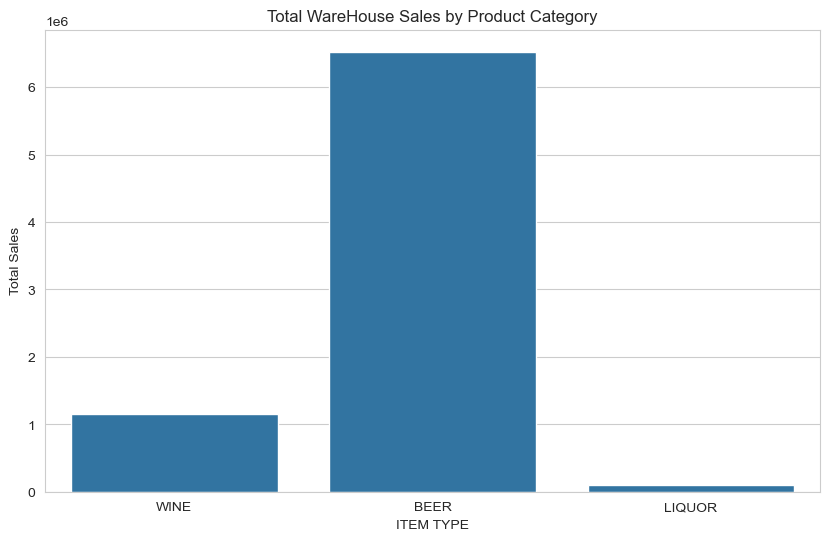

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='ITEM TYPE', y='WAREHOUSE SALES', data = df_filtered, estimator=sum, ci=None)
plt.title('Total WareHouse Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

Insight:

Bar Plot: BEER generates the most total warehouse revenue.

<Figure size 1000x600 with 0 Axes>

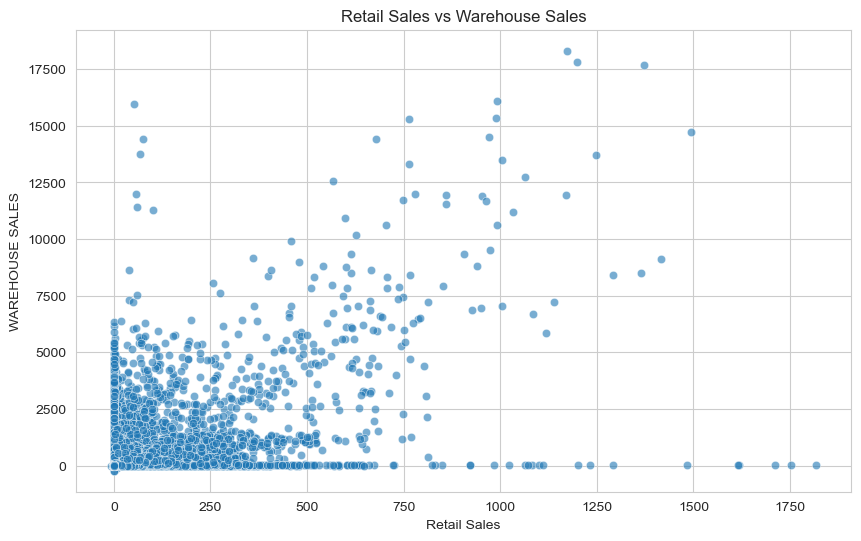

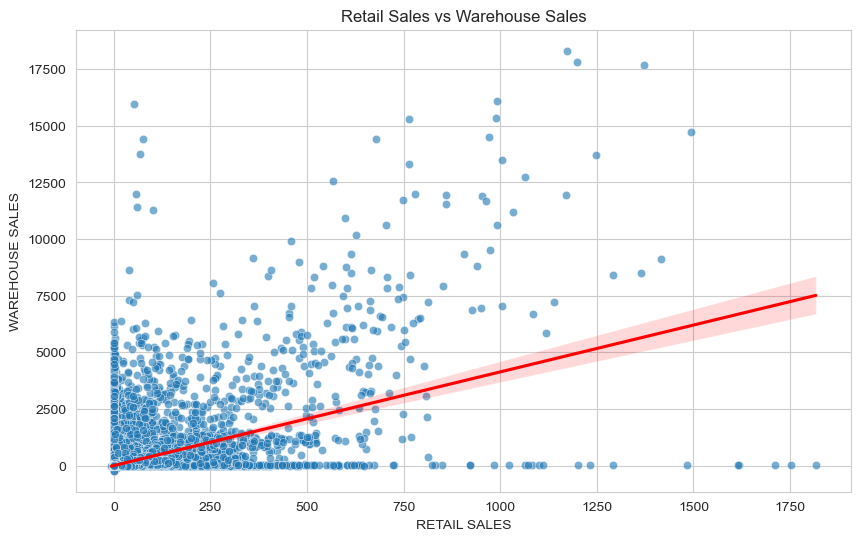

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='RETAIL SALES', y='WAREHOUSE SALES', data=df_filtered, alpha=0.6)
plt.title('Retail Sales vs Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('WareHouse Sales')
sns.regplot(x='RETAIL SALES', y='WAREHOUSE SALES', data=df_filtered, scatter=False, color='red')
plt.show()

Insight:

Scatter Plot: Reveals a potential positive relationship. As retail sales increase, warehouse sales also tend to increase. This is a good sign for our linear regression model! The red trend line shows this positive correlation.

<Figure size 1000x600 with 0 Axes>

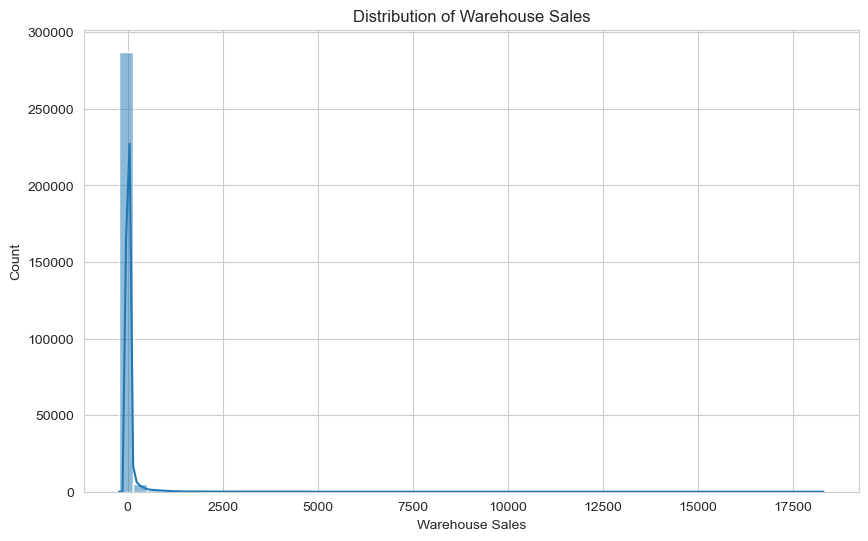

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['WAREHOUSE SALES'],bins=50,kde=True)
plt.title('Distribution of Warehouse Sales')
plt.xlabel('Warehouse Sales')
# Note the long tail! Most sales are low, but a few are very high.
plt.show()

Insight:

Histogram: Shows that the distribution of sales is "right-skewed". Most items have low sales volumes, while a few products have very high sales. This is common in sales data.



In [62]:
X = df_filtered[['RETAIL SALES', 'ITEM TYPE']].copy()
X = pd.get_dummies(X, columns=['ITEM TYPE'], drop_first=True)
y = df_filtered['WAREHOUSE SALES']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# random_state ensures we get the same split every time, for reproducibility.

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
print('Model Evaluation:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-Squared Score (R2):', r2_score(y_test,y_pred))

Model Evaluation:
Mean Absolute Error (MAE): 49.86971744900569
Mean Squared Error (MSE): 41072.92368593989
Root Mean Squared Error (RMSE): 202.6645595212441
R-Squared Score (R2): 0.2902403634221784


In [74]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                  Coefficient
RETAIL SALES         4.104602
ITEM TYPE_LIQUOR  -149.412538
ITEM TYPE_WINE    -109.990115


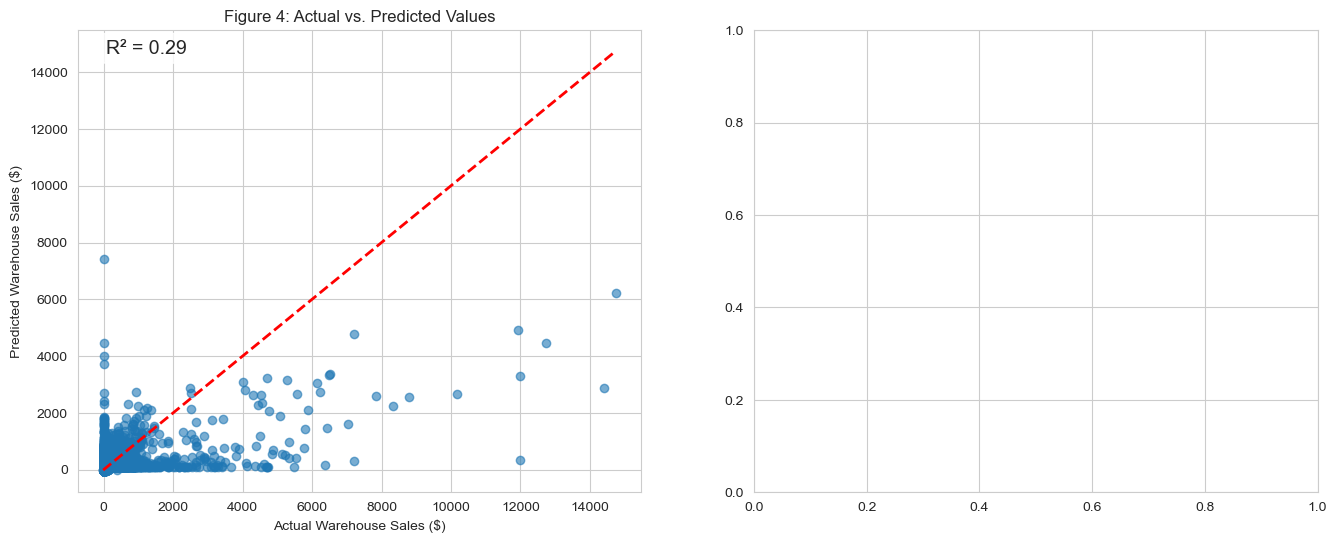

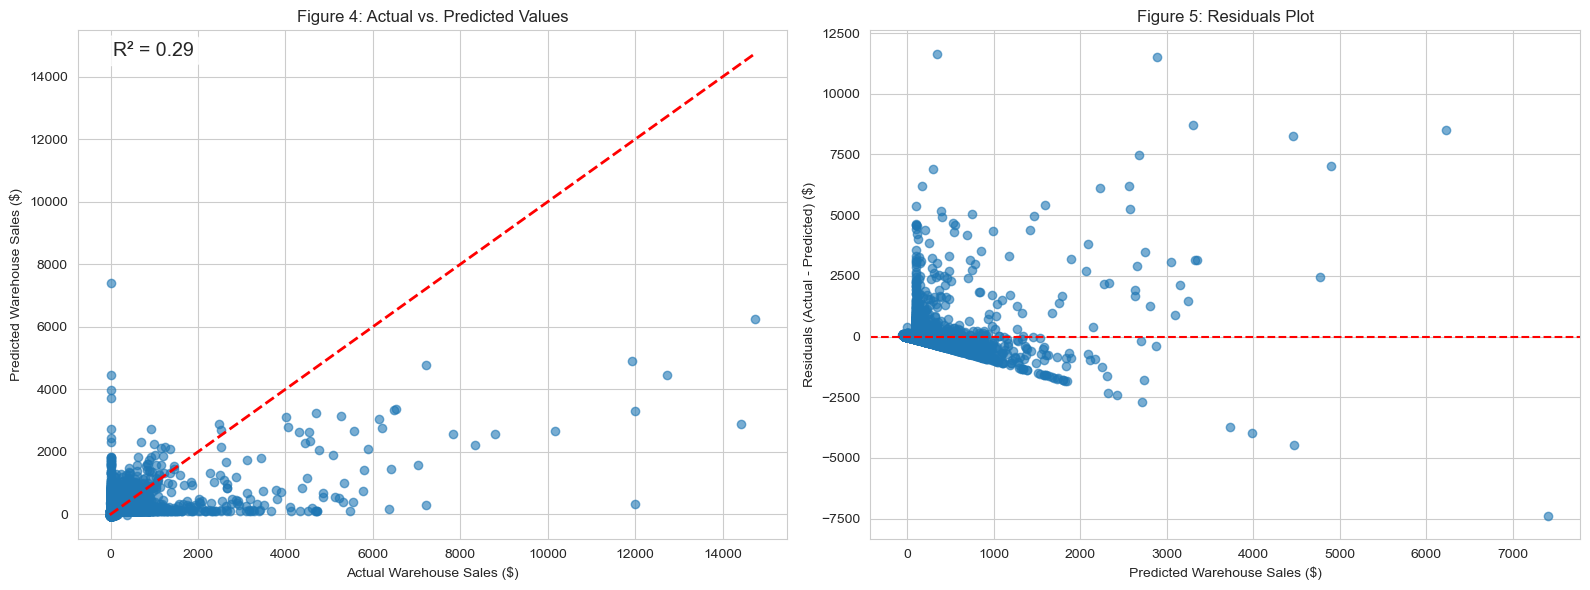

In [78]:
# 6.1 - Actual vs. Predicted Values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.scatter(y_test, y_pred, alpha=0.6)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Warehouse Sales ($)')
ax1.set_ylabel('Predicted Warehouse Sales ($)')
ax1.set_title('Figure 4: Actual vs. Predicted Values')
r2 = r2_score(y_test, y_pred)
ax1.text(0.05, 0.95, f'R² = {r2:.2f}', transform=ax1.transAxes, fontsize=14,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Warehouse Sales ($)')
ax2.set_ylabel('Residuals (Actual - Predicted) ($)')
ax2.set_title('Figure 5: Residuals Plot')
plt.tight_layout()
plt.show()

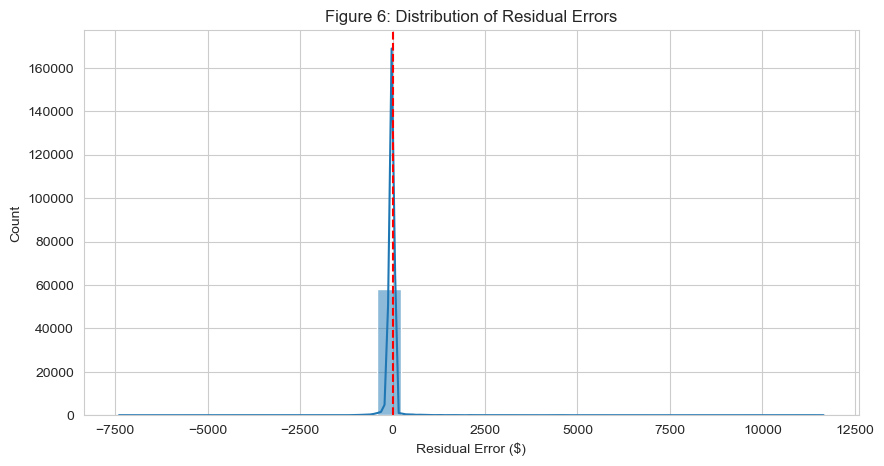

In [80]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Figure 6: Distribution of Residual Errors')
plt.xlabel('Residual Error ($)')
plt.show()